Here I compare the real data, SN sims (BIG), and KN sims for various cuts.  Notably, I add flux-change-per-time cuts.

In [77]:
import numpy as np
from glob import glob
import os
import des_utils
import des_io
import trigColors
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'
import matplotlib.transforms as transforms
reload(des_utils)

<module 'des_utils' from 'des_utils.py'>

In [78]:
SNpath = "../DESY1_KNtrigger_SNEFF1/*DAT"
KNpath = '../KNSimDataHubble092115/ZD092115_ASCII/*DAT'
datapath = "../DESY1_numepoch1_iz_real_text/*dat"
hostaccfile_s = '../hostMatching/Hostless_KN_DES_SVA1_C1.txt'
hostaccfile_d = '../hostMatching/Hostless_KN_DES_SVA1_X3.txt'
hostaccfiles = [hostaccfile_s,hostaccfile_d]
datatypes = ['KN','SN','data']
filetypes = ['sim','sim','data']
paths = [KNpath,SNpath, datapath]
fieldtypes = ['shallow','deep']
dict1 = dict()
for f,datatype in enumerate(datatypes):  
    for n,fieldtype in enumerate(fieldtypes):
        dict1[datatype+'_'+fieldtype] = trigColors.trigColors(paths[f],filetypes[f],fieldtype,SNRand=1)
        dict1[datatype+'_'+fieldtype]['detections'] = des_utils.get_detection_flags_list(dict1[datatype+'_'+fieldtype]['cnites'],
                                                                                        dict1[datatype+'_'+fieldtype]['zbandinfo'],
                                                                                        dict1[datatype+'_'+fieldtype]['ibandinfo'],
                                                                                       3,10,1)
        if datatype == 'data':
            dict1[datatype+'_'+fieldtype]['HOSTGAL_PHOTOZ'],dict1[datatype+'_'+fieldtype]['DLR'],dict1[datatype+'_'+fieldtype]['SEP'] = des_utils.hostgalAssociate(headerlist=dict1[datatype+'_'+fieldtype]['headers'],
                                                                              datatype=filetypes[f])
        elif datatype == 'KN':
            dict1[datatype+'_'+fieldtype]['HOSTGAL_PHOTOZ'],dict1[datatype+'_'+fieldtype]['DLR'],dict1[datatype+'_'+fieldtype]['SEP'] = des_utils.hostgalAssociate(infile=hostaccfiles[n], headerlist=dict1[datatype+'_'+fieldtype]['headers'],
                                                                              datatype=filetypes[f])
        else:
            dict1[datatype+'_'+fieldtype]['HOSTGAL_PHOTOZ'],dict1[datatype+'_'+fieldtype]['SEP'] = des_utils.hostgalAssociate(headerlist=dict1[datatype+'_'+fieldtype]['headers'],
                                                                              datatype=filetypes[f])
        

**************shallow KN*****************
283 [363 283]
363 [363 283]
**************deep KN*****************
168 [168 206]
206 [168 206]
**************shallow SN*****************
**************deep SN*****************
**************shallow data*****************
[ {'DECL': '-27.700422', 'PRIVATE(DES_mjd_trigger)': '56567.222', 'SNID': '1220619', 'PRIVATE(DES_numepochs_ml)': '3', 'HOSTGAL_OBJID': '2940', 'PRIVATE(DES_numepochs_ml_Y0)': '0', 'HOSTGAL_SPECZ': '0.4492', 'PRIVATE(DES_cand_type)': '0', 'HOSTGAL_MAG': '23.88', 'PRIVATE(DES_numepochs_ml_Y4)': '0', 'PRIVATE(DES_numepochs_ml_Y6)': '0', 'IAUC': 'DES13C1gpn', 'MWEBV_ERR': '0', 'PRIVATE(DES_numepochs_ml_Y2)': '0', 'PRIVATE(DES_ccdnum)': '52', 'PRIVATE(DES_numepochs)': '3', 'PRIVATE(DES_numepochs_trigger)': '3', 'MWEBV': '0', 'PRIVATE(DES_latest_nite_ml)': '20131009', 'PRIVATE(DES_hostgal_gradient_g)': '1.88', 'HOSTGAL_SB_FLUXCAL': '4.23', 'REDSHIFT_HELIO': '0.4492', 'RA': '53.870300', 'FILTERS': 'griz', 'PRIVATE(DES_nobs_offccd)': '

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:62: RuntimeWarning: invalid value encountered in greater


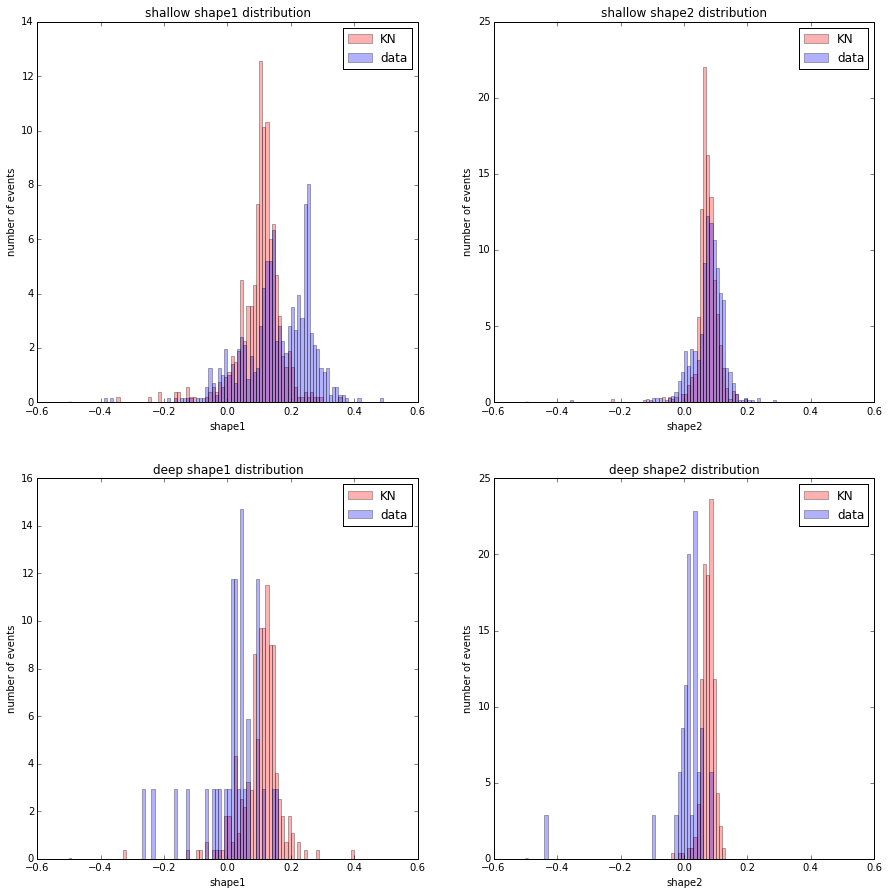

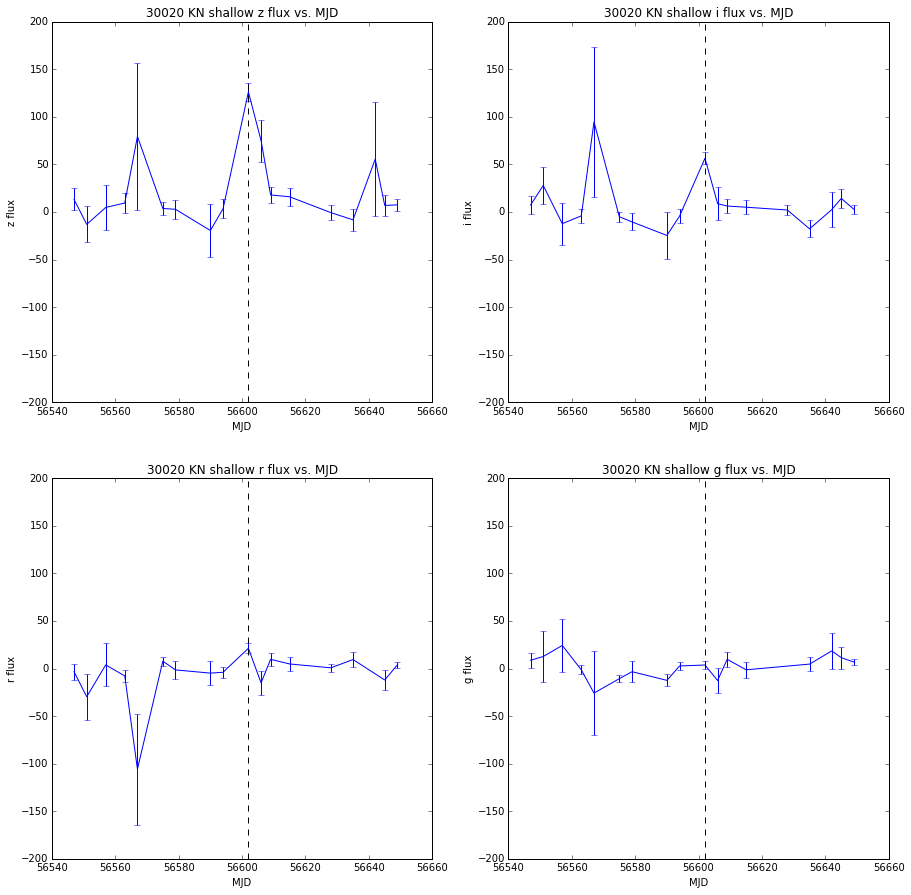

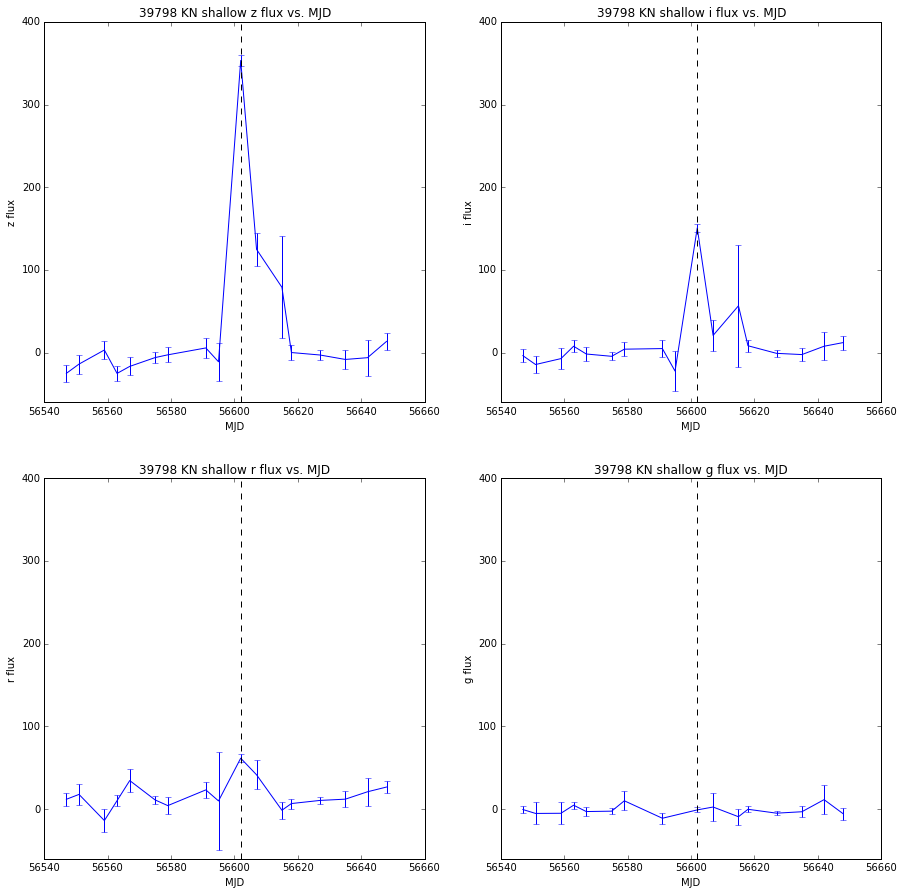

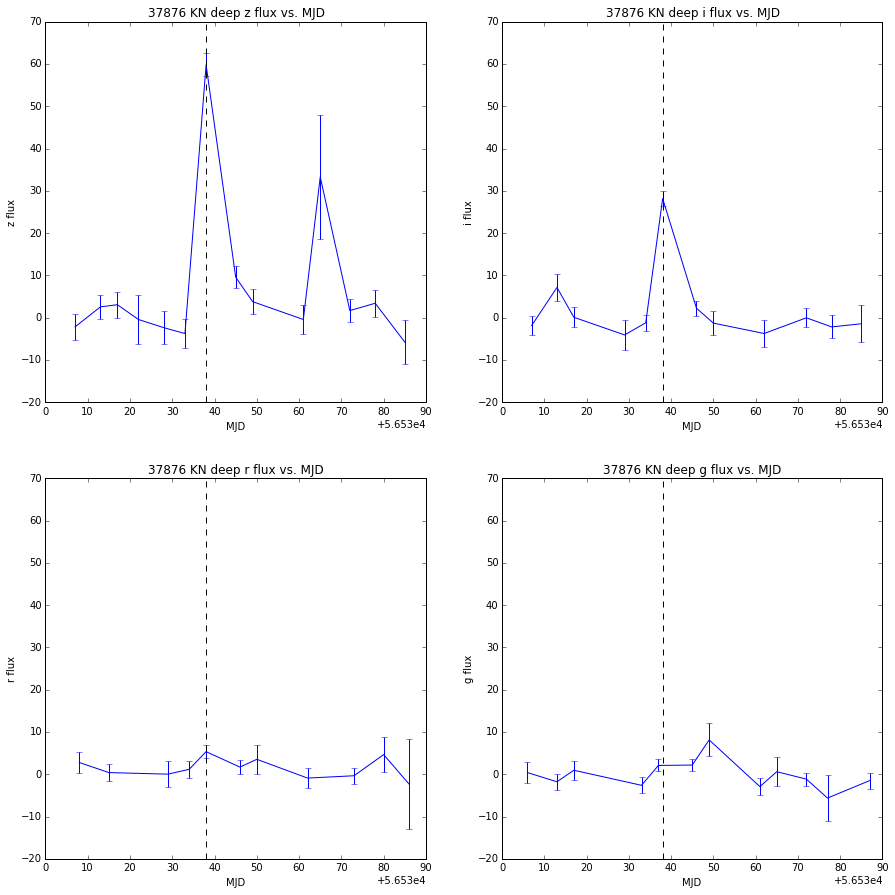

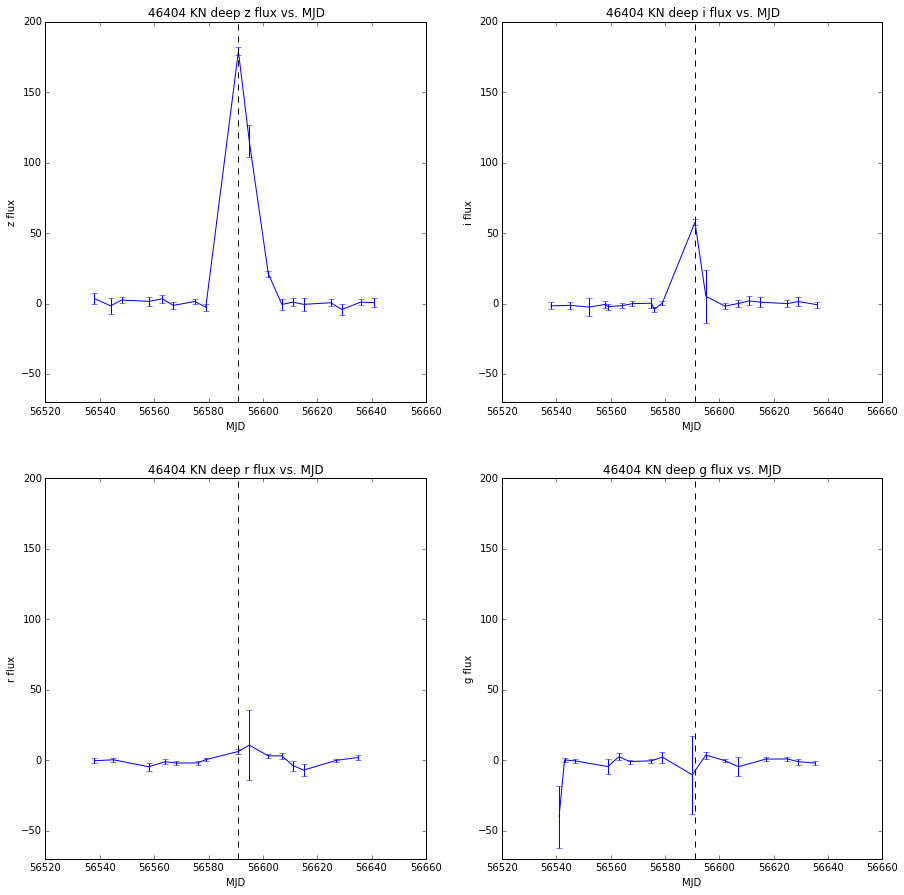

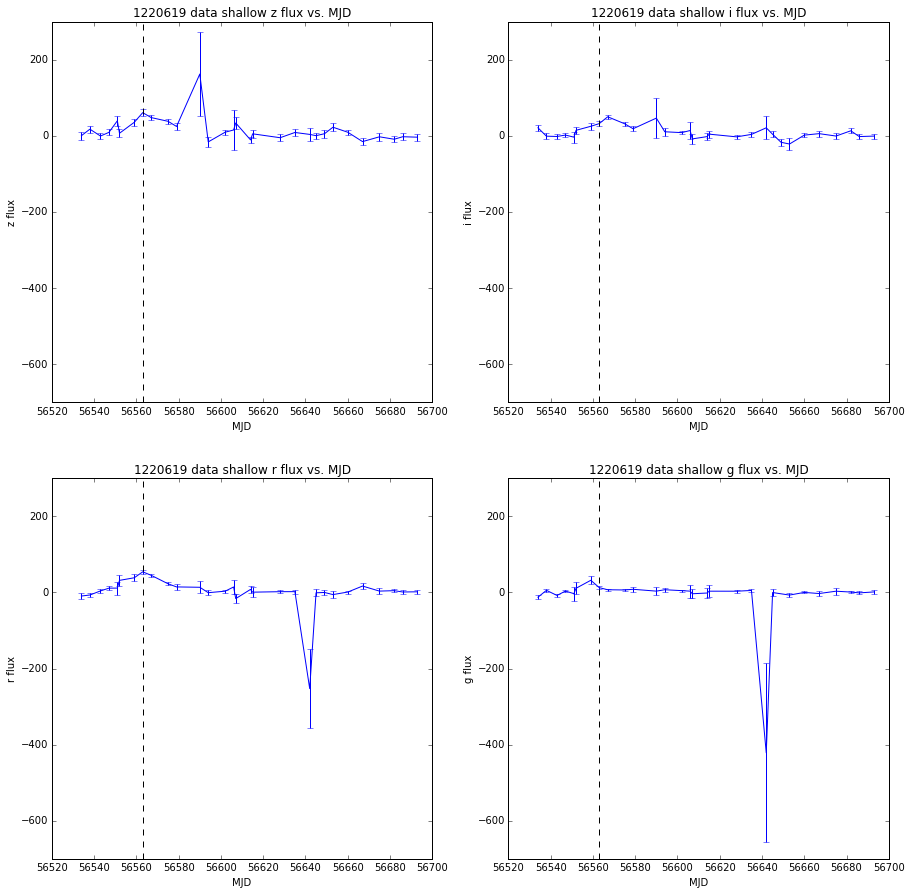

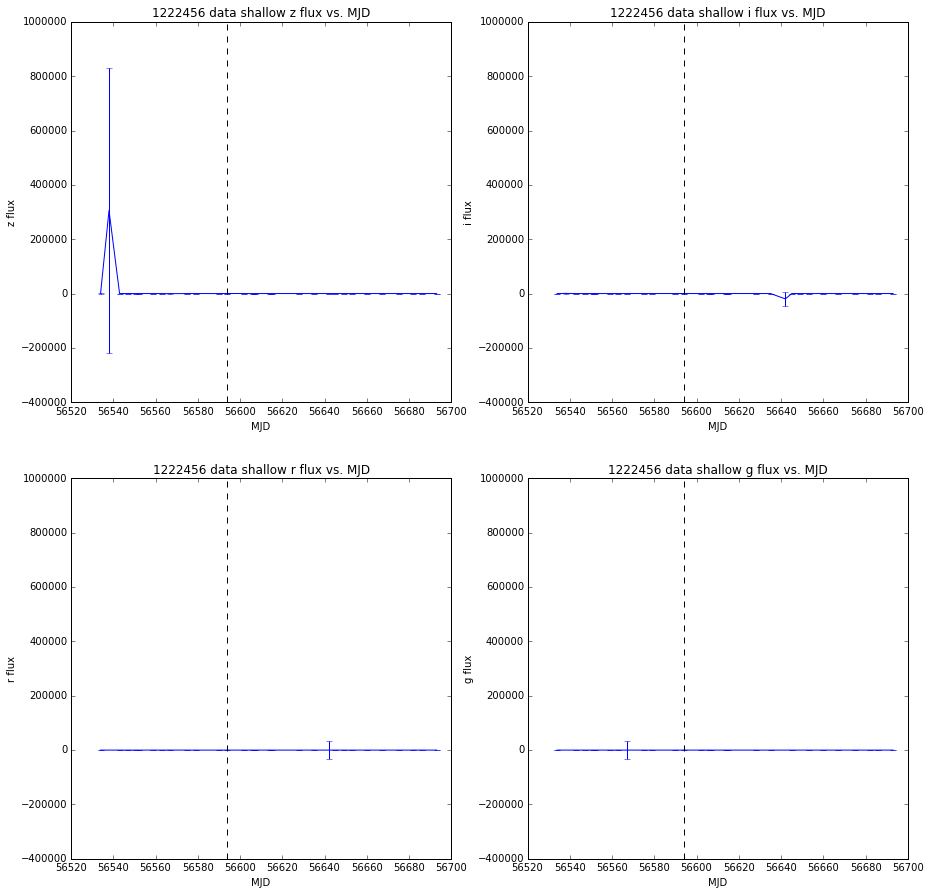

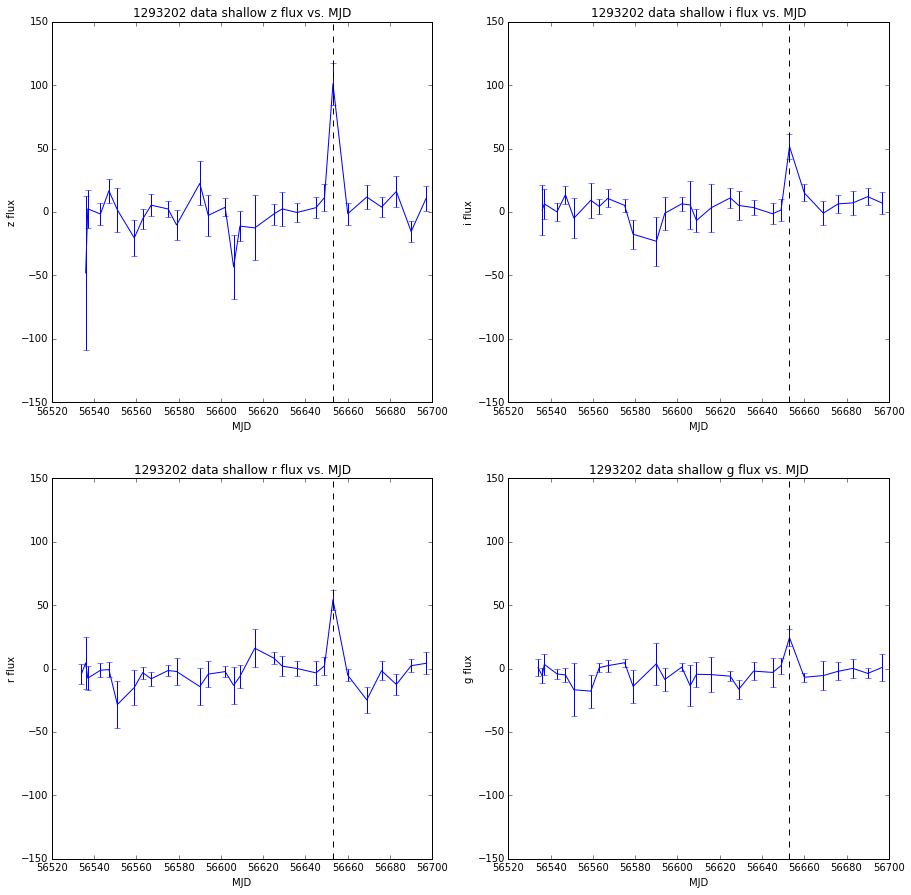

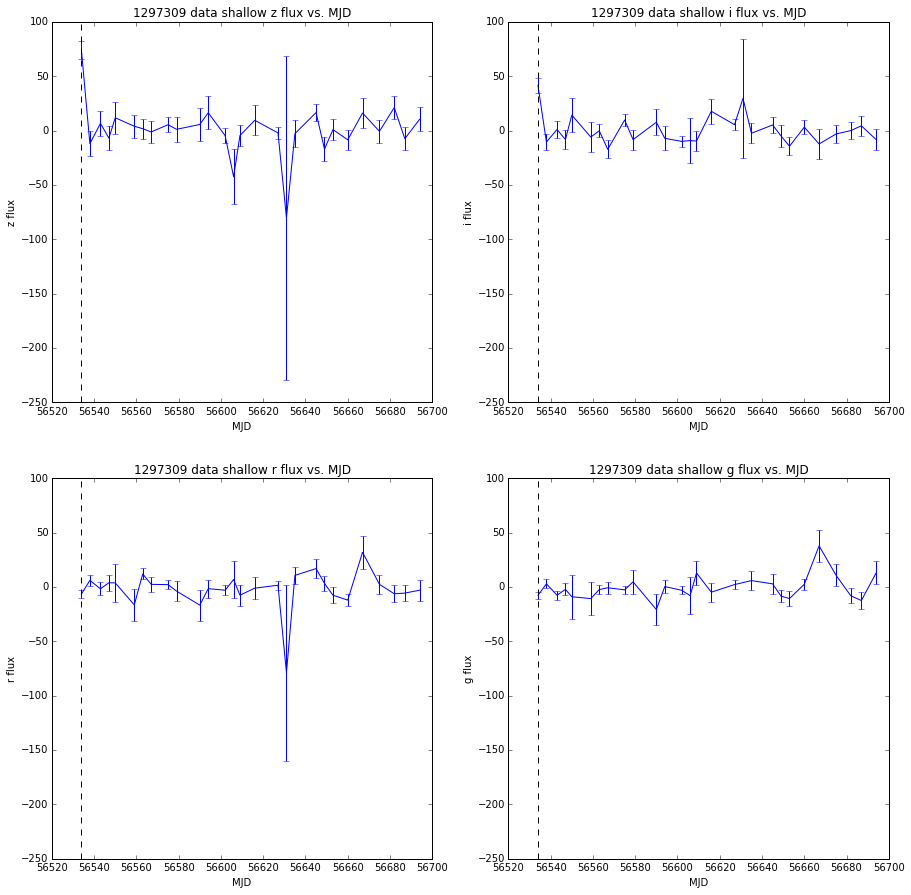

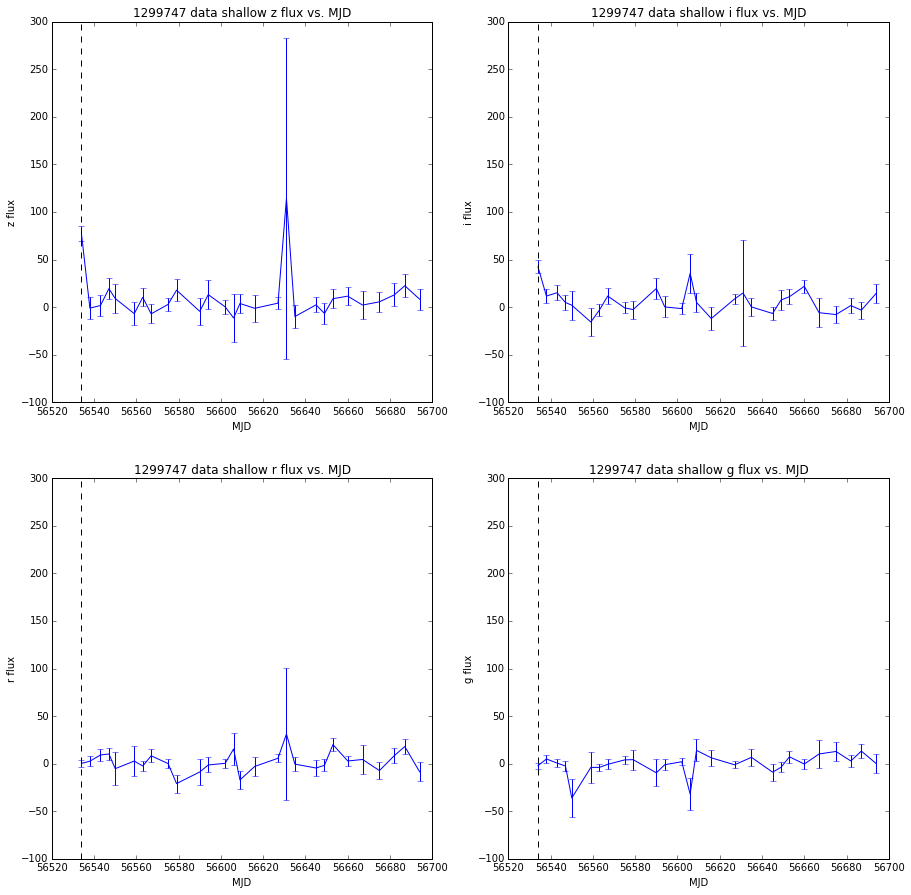

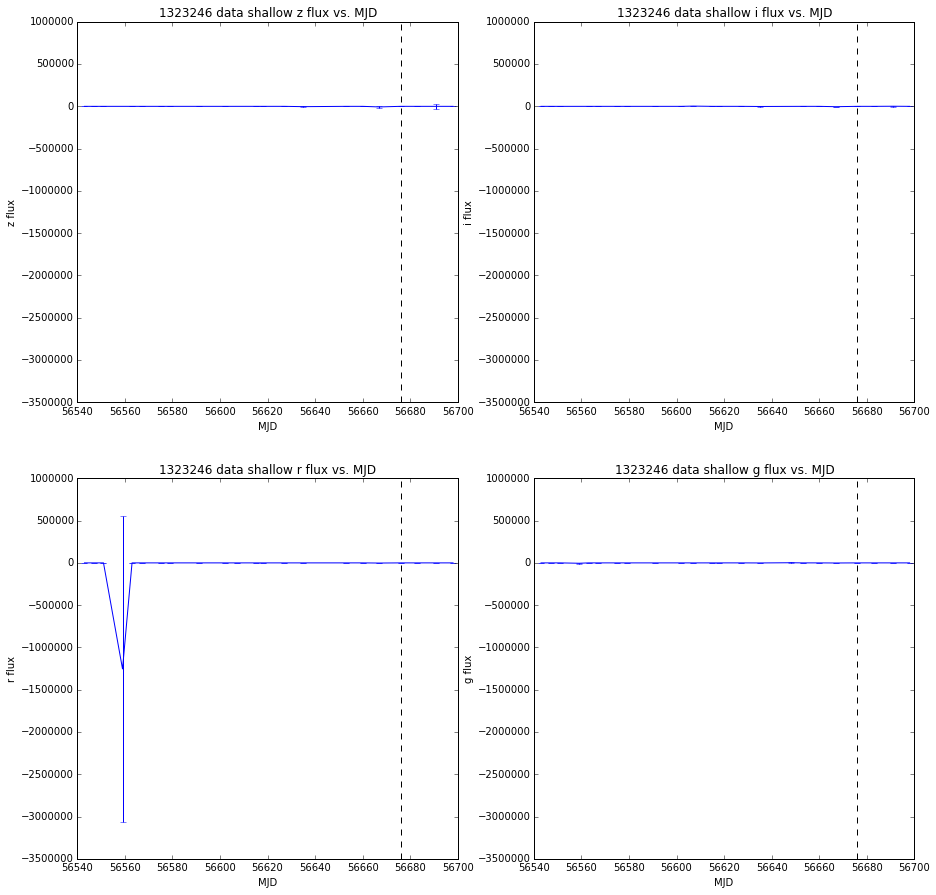

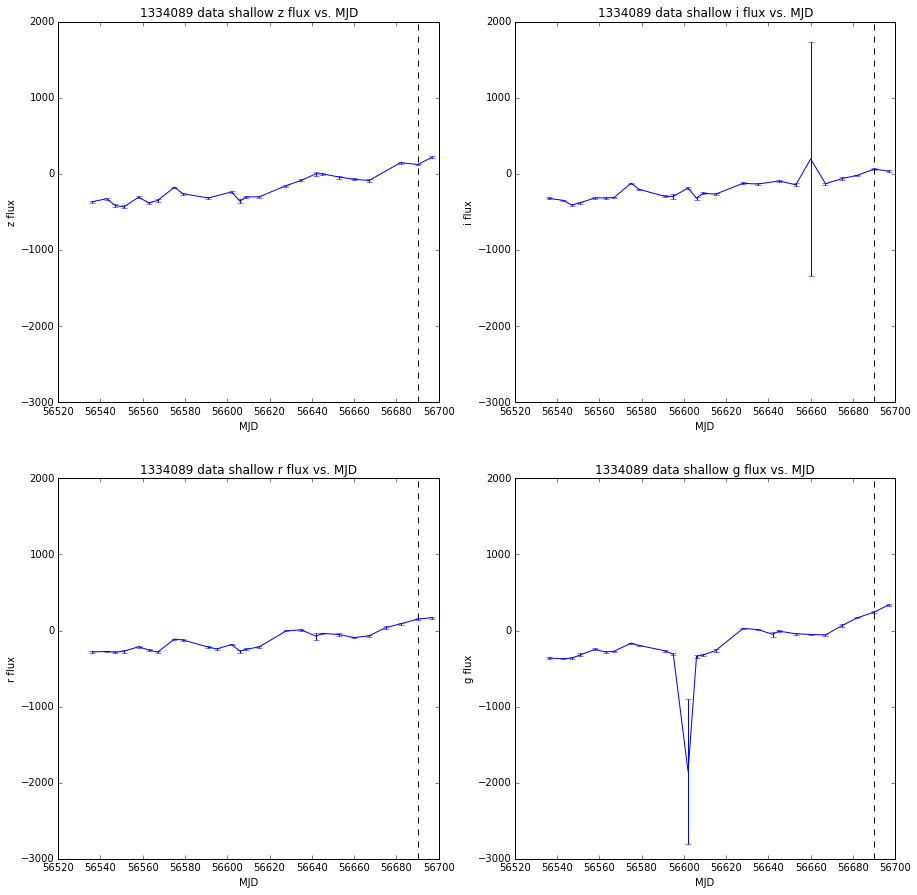

In [88]:
reload(trigColors)
reload(des_utils)
plotcolorlist = ['r','g','b']
trigseplim = 20 #days
colorlim =0.5
seplim = 2
dlrlim = 2
zlim = 0.1
angsepmax = 0.6
minnites = 2
maxnites = 14
zslopelim1 = 0.0
zslopelim2 = 0.0
PSFmax = 2/(2.355*.27) # 1.5 arcsec converted to sigma pixel
M_solar = [0.001,0.01,0.1]
beta = [0.1,0.2,0.3]
rownames = np.array(['trigs', '+followup','+PSF','+angsep','+priorobs','+timescale','+zveto','+shape1','+shape2','+color'])
outputdata_s = np.empty([len(rownames),len(datatypes)],dtype=int)
outputdata_d = np.empty([len(rownames),len(datatypes)],dtype=int)
outputdata=[outputdata_s,outputdata_d]
legendlist = []
figurex = plt.figure(figsize=(15,15))
axhello1 = figurex.add_subplot(221)
axhello2 = figurex.add_subplot(222)
axhello3 = figurex.add_subplot(223)
axhello4 = figurex.add_subplot(224)
for f,filetype in enumerate(datatypes):
    for n,fieldtype in enumerate(fieldtypes):
        print '**************'+fieldtype + ' ' + filetype+'*****************'
        trigsel = dict1[filetype+'_'+fieldtype]['trigs']
        detsel = dict1[filetype+'_'+fieldtype]['detections']       
        trignites = dict1[filetype+'_'+fieldtype]['cnites']
        colors= dict1[filetype+'_'+fieldtype]['colors']
        z = dict1[filetype+'_'+fieldtype]['HOSTGAL_PHOTOZ']
        zbandinfo = dict1[filetype+'_'+fieldtype]['zbandinfo']
        ibandinfo = dict1[filetype+'_'+fieldtype]['ibandinfo']
        rbandinfo = dict1[filetype+'_'+fieldtype]['rbandinfo']
        gbandinfo = dict1[filetype+'_'+fieldtype]['gbandinfo']
        headers = dict1[filetype+'_'+fieldtype]['headers']

        PSFsel = trigColors.get_PSFsel(zbandinfo,ibandinfo,trignites,PSFmax)
        
        nitediffs,nitediffsel = trigColors.get_nitediff(zbandinfo,ibandinfo,rbandinfo,zbandinfo,trigseplim)

        zsel = z < zlim
        if filetype == 'SN':
            hostgalsel = zsel
        else:
            dlr = dict1[filetype+'_'+fieldtype]['DLR']
            dlrsel = dlr > dlrlim
            sep = dict1[filetype+'_'+fieldtype]['SEP']
            sepsel = sep > seplim
            hostgalsel = zsel | sepsel | dlrsel 
            
        zslopes,zslopes2,zslopesel,zslopesel2 = trigColors.get_slopes(zbandinfo,trignites,zslopelim1,zslopelim2)
        
        angsep,angsepsel = trigColors.get_angsep(headers,angsepmax)
        
        priorobssel = trigColors.get_priorobssel(zbandinfo,ibandinfo,rbandinfo,gbandinfo,trignites,minnites,maxnites)
        
        colorsel = colors > colorlim
        #print 'Nevent (cuts: trig, followup, zveto, timescale, color) objects: ', np.sum(trigsel & detsel & hostgalsel&nitediffsel&colorsel)
        outputdata[n][rownames=='trigs',f] = np.sum(trigsel)
        outputdata[n][rownames=='+followup',f] = np.sum(trigsel & detsel)
        outputdata[n][rownames=='+PSF',f] = np.sum(trigsel & detsel & PSFsel)
        outputdata[n][rownames=='+angsep',f] = np.sum(trigsel & detsel & angsepsel & PSFsel)
        outputdata[n][rownames=='+priorobs',f] = np.sum(trigsel & detsel & angsepsel & priorobssel & PSFsel)
        outputdata[n][rownames=='+timescale',f] = np.sum(trigsel & detsel & nitediffsel & angsepsel & priorobssel & PSFsel)
        outputdata[n][rownames=='+zveto',f] = np.sum(trigsel & detsel & nitediffsel & hostgalsel & angsepsel & priorobssel & PSFsel)
        outputdata[n][rownames=='+shape1',f] = np.sum(trigsel & detsel & nitediffsel & hostgalsel & zslopesel & angsepsel & priorobssel & PSFsel)
        outputdata[n][rownames=='+shape2',f] = np.sum(trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & angsepsel & priorobssel & PSFsel) 
        outputdata[n][rownames=='+color',f] = np.sum(trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & colorsel & angsepsel & priorobssel & PSFsel)

        if (filetype == 'data' or filetype == 'KN') and fieldtype=='shallow':
            selector = trigsel & detsel & nitediffsel
            axhello1.hist(zslopes[selector],bins=100,range=(-.5,.5),color=plotcolorlist[f],alpha=0.3,normed=True)
            axhello1.set_xlabel('shape1')
            axhello1.set_ylabel('number of events')
            axhello1.set_title('shallow shape1 distribution')
            axhello1.legend(['KN','data'])
            axhello2.hist(zslopes2[selector],bins=100,range=(-.5,.5),color=plotcolorlist[f],alpha=0.3,normed=True)
            axhello2.set_xlabel('shape2')
            axhello2.set_ylabel('number of events')
            axhello2.set_title('shallow shape2 distribution')
            axhello2.legend(['KN','data'])
        if (filetype == 'data' or filetype == 'KN') and fieldtype=='deep':
            selector = trigsel & detsel & nitediffsel
            axhello3.hist(zslopes[selector],bins=100,range=(-.5,.5),color=plotcolorlist[f],alpha=0.3,normed=True)
            axhello3.set_xlabel('shape1')
            axhello3.set_ylabel('number of events')
            axhello3.set_title('deep shape1 distribution')
            axhello3.legend(['KN','data'])
            axhello4.hist(zslopes2[selector],bins=100,range=(-.5,.5),color=plotcolorlist[f],alpha=0.3,normed=True)
            axhello4.set_xlabel('shape2')
            axhello4.set_ylabel('number of events')
            axhello4.set_title('deep shape2 distribution')
            axhello4.legend(['KN','data'])
        if filetype == 'data' and fieldtype == 'shallow':
            print np.array(dict1[filetype+'_'+fieldtype]['headers'])[trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & colorsel & angsepsel & priorobssel]
            print np.array(dict1[filetype+'_'+fieldtype]['cnites'])[trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & colorsel & angsepsel & priorobssel]
            nocolorcutsel = trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & angsepsel & priorobssel
            wfile = open('passingdata','w')
            for num,zband in enumerate(zbandinfo[nocolorcutsel]):
                try:
                    wfile.write('des_real_0'+str(int(float(np.array(dict1[filetype+'_'+fieldtype]['headers'])[nocolorcutsel][num]['SNID'])))+'.dat\n') 
                except ValueError:
                    wfile.write('des_real_0'+str(int(float(np.array(dict1[filetype+'_'+fieldtype]['headers'])[nocolorcutsel][num]['PRIVATE(DES_snid)'])))+'.dat\n') 
            wfile.close()
            allsel = trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & colorsel
            if np.sum(allsel) > 0:
                for num, zband in enumerate(zbandinfo[allsel]):
                    #plt.figure()
                    #plt.errorbar(ibandinfo[allsel][num][1],ibandinfo[allsel][num][2],yerr=ibandinfo[allsel][num][4],color='b')
                    #plt.errorbar(zband[1],zband[2],yerr=zband[4],color='r')
                    snid = np.array(dict1[filetype+'_'+fieldtype]['headers'])[allsel][num]['PRIVATE(DES_snid)']
                    #plt.title('flux for object number ' + snid)
                    #plt.xlabel('MJD')
                    #plt.ylabel('flux')
                    vertline = trignites[allsel][num][0]
                    #plt.axvline(vertline,linestyle = '--',color='black')
                    #plt.legend(['i-flux','z-flux'])
                    lcfig = plt.figure(figsize=(15,15))
                    axz = lcfig.add_subplot(221)
                    axi = lcfig.add_subplot(222)
                    axr = lcfig.add_subplot(223)
                    axg = lcfig.add_subplot(224)
                    axi.errorbar(ibandinfo[allsel][num][1],ibandinfo[allsel][num][2],yerr=ibandinfo[allsel][num][4],color='b')
                    axz.errorbar(zband[1],zband[2],yerr=zband[4],color='b')
                    axr.errorbar(rbandinfo[allsel][num][1],rbandinfo[allsel][num][2],yerr=rbandinfo[allsel][num][4],color='b')
                    axg.errorbar(gbandinfo[allsel][num][1],gbandinfo[allsel][num][2],yerr=gbandinfo[allsel][num][4],color='b')
                    axi.axvline(vertline,linestyle = '--',color='black')
                    axz.axvline(vertline,linestyle = '--',color='black')
                    axr.axvline(vertline,linestyle = '--',color='black')
                    axg.axvline(vertline,linestyle = '--',color='black')
                    xmini,xmaxi = axi.get_xlim()
                    ymini,ymaxi = axi.get_ylim()
                    xminz,xmaxz = axz.get_xlim()
                    yminz,ymaxz = axz.get_ylim()
                    xming,xmaxg = axg.get_xlim()
                    yming,ymaxg = axg.get_ylim()
                    xminr,xmaxr = axr.get_xlim()
                    yminr,ymaxr = axr.get_ylim()
                    xmins = [xmini,xminz,xming,xminr]
                    ymins = [ymini,yminz,yming,yminr]
                    xmaxs = [xmaxi,xmaxz,xmaxg,xmaxr]
                    ymaxs = [ymaxi,ymaxz,ymaxg,ymaxr]
                    xmin = min(xmins)
                    ymin = min(ymins)
                    xmax = max(xmaxs)
                    ymax = max(ymaxs)
                    axi.set_xlim([xmin,xmax])
                    axi.set_ylim([ymin,ymax])
                    axz.set_xlim([xmin,xmax])
                    axz.set_ylim([ymin,ymax])
                    axr.set_xlim([xmin,xmax])
                    axr.set_ylim([ymin,ymax])
                    axg.set_xlim([xmin,xmax])
                    axg.set_ylim([ymin,ymax])
                    axi.set_title(snid+ ' '+filetype+' '+fieldtype+' i flux vs. MJD')
                    axz.set_title(snid+ ' '+filetype+' '+fieldtype+' z flux vs. MJD')
                    axr.set_title(snid+ ' '+filetype+' '+fieldtype+' r flux vs. MJD')
                    axg.set_title(snid+ ' '+filetype+' '+fieldtype+' g flux vs. MJD')
                    axi.set_xlabel('MJD')
                    axz.set_xlabel('MJD')
                    axr.set_xlabel('MJD')
                    axg.set_xlabel('MJD')
                    axi.set_ylabel('i flux')
                    axz.set_ylabel('z flux')
                    axr.set_ylabel('r flux')
                    axg.set_ylabel('g flux')
        if filetype == 'KN':
            allsel = trigsel & detsel & nitediffsel & hostgalsel & zslopesel & zslopesel2 & colorsel
            if np.sum(allsel) > 0:
                randints = np.random.randint(0,np.sum(allsel),size=2)
                for num, zband in enumerate(zbandinfo[allsel]):
                    if num == randints[0] or num == randints[1]:
                        print num, randints
                        #plt.figure()
                        #plt.errorbar(ibandinfo[allsel][num][1],ibandinfo[allsel][num][2],yerr=ibandinfo[allsel][num][4],color='b')
                        #plt.errorbar(zband[1],zband[2],yerr=zband[4],color='r')
                        snid = np.array(dict1[filetype+'_'+fieldtype]['headers'])[allsel][num]['SNID']
                        #plt.title('flux for object number ' + snid)
                        #plt.xlabel('MJD')
                        #plt.ylabel('flux')
                        vertline = trignites[allsel][num][0]
                        #plt.axvline(vertline,linestyle = '--',color='black')
                        #plt.legend(['i-flux','z-flux'])
                        lcfig = plt.figure(figsize=(15,15))
                        axz = lcfig.add_subplot(221)
                        axi = lcfig.add_subplot(222)
                        axr = lcfig.add_subplot(223)
                        axg = lcfig.add_subplot(224)
                        axi.errorbar(ibandinfo[allsel][num][1],ibandinfo[allsel][num][2],yerr=ibandinfo[allsel][num][4],color='b')
                        axz.errorbar(zband[1],zband[2],yerr=zband[4],color='b')
                        axr.errorbar(rbandinfo[allsel][num][1],rbandinfo[allsel][num][2],yerr=rbandinfo[allsel][num][4],color='b')
                        axg.errorbar(gbandinfo[allsel][num][1],gbandinfo[allsel][num][2],yerr=gbandinfo[allsel][num][4],color='b')
                        axi.axvline(vertline,linestyle = '--',color='black')
                        axz.axvline(vertline,linestyle = '--',color='black')
                        axr.axvline(vertline,linestyle = '--',color='black')
                        axg.axvline(vertline,linestyle = '--',color='black')
                        xmini,xmaxi = axi.get_xlim()
                        ymini,ymaxi = axi.get_ylim()
                        xminz,xmaxz = axz.get_xlim()
                        yminz,ymaxz = axz.get_ylim()
                        xming,xmaxg = axg.get_xlim()
                        yming,ymaxg = axg.get_ylim()
                        xminr,xmaxr = axr.get_xlim()
                        yminr,ymaxr = axr.get_ylim()
                        xmins = [xmini,xminz,xming,xminr]
                        ymins = [ymini,yminz,yming,yminr]
                        xmaxs = [xmaxi,xmaxz,xmaxg,xmaxr]
                        ymaxs = [ymaxi,ymaxz,ymaxg,ymaxr]
                        xmin = min(xmins)
                        ymin = min(ymins)
                        xmax = max(xmaxs)
                        ymax = max(ymaxs)
                        axi.set_xlim([xmin,xmax])
                        axi.set_ylim([ymin,ymax])
                        axz.set_xlim([xmin,xmax])
                        axz.set_ylim([ymin,ymax])
                        axr.set_xlim([xmin,xmax])
                        axr.set_ylim([ymin,ymax])
                        axg.set_xlim([xmin,xmax])
                        axg.set_ylim([ymin,ymax])
                        axi.set_title(snid+ ' '+filetype+' '+fieldtype+' i flux vs. MJD')
                        axz.set_title(snid+ ' '+filetype+' '+fieldtype+' z flux vs. MJD')
                        axr.set_title(snid+ ' '+filetype+' '+fieldtype+' r flux vs. MJD')
                        axg.set_title(snid+ ' '+filetype+' '+fieldtype+' g flux vs. MJD')
                        axi.set_xlabel('MJD')
                        axz.set_xlabel('MJD')
                        axr.set_xlabel('MJD')
                        axg.set_xlabel('MJD')
                        axi.set_ylabel('i flux')
                        axz.set_ylabel('z flux')
                        axr.set_ylabel('r flux')
                        axg.set_ylabel('g flux')
        

In [80]:
colnames = ['Cuts','Ndata','N_SN_sim','N_KN_sim','Ndata/N_SN', 'N_KN/N_KN(trig)','KNefficiency','Snstv Rate']

In [81]:
dumpfile = '../KNSimDataRateLims081715_z0.2/ZDNTEST_MAGOFF-0/ZDNTEST_MAGOFF-0.DUMP'
dumpdata = np.genfromtxt(dumpfile,skip_header=1,names=True,dtype=None)
deepsel = (dumpdata['FIELD'] == 'X3') | (dumpdata['FIELD'] == 'C3')
shallowsel = ~deepsel
fieldsels = [shallowsel,deepsel]
NKN_tot = [np.sum(shallowsel),np.sum(deepsel)]

In [89]:
outputtable_s = np.empty([len(rownames)+1,len(colnames)],dtype=object)
outputtable_d = np.empty([len(rownames)+1,len(colnames)],dtype=object)
outputtable = [outputtable_s,outputtable_d]
fieldsizeratio = [1.,.25]
for n,fieldtype in enumerate(fieldtypes):
    outputtable[n][0,:] = colnames
    outputtable[n][1:,0] = rownames
    Ndata = [str(it) for i,it in enumerate(outputdata[n][:,2])]
    N_SN_sim = [str(it) for i,it in enumerate(outputdata[n][:,1])]
    N_KN_sim = [str(it) for i,it in enumerate(outputdata[n][:,0])]
    data_sn_ratio = [str(np.around(it,decimals=5)) for i,it in enumerate(np.divide(outputdata[n][:,2].astype(float),outputdata[n][:,1]))]
    KN_cut_trig_ratio = [str(np.around(it,decimals=5)) for i,it in enumerate(outputdata[n][:,0].astype(float)/outputdata[n][0,0])]
    KNeff = [str(np.around(it,decimals=5)) for i,it in enumerate(outputdata[n][:,0].astype(float)/NKN_tot[n])]
    snstvRate = [str(np.around(np.divide(1.,it*.52*.9e5*fieldsizeratio[n]),decimals=5)) for i,it in enumerate(outputdata[n][:,0].astype(float)/NKN_tot[n])]
    outputtable[n][1:,1] = Ndata
    outputtable[n][1:,2] = N_SN_sim
    outputtable[n][1:,3] = N_KN_sim
    outputtable[n][1:,4] = data_sn_ratio
    outputtable[n][1:,5] = KN_cut_trig_ratio
    outputtable[n][1:,6] = KNeff
    outputtable[n][1:,7] = snstvRate

In [90]:
print '**** shallow fields ****'
for l in range(0,len(outputtable[0][:,0])):
    print outputtable[0][l,0].rjust(10), 
    print outputtable[0][l,1].rjust(7), 
    print outputtable[0][l,2].rjust(7),
    print outputtable[0][l,3].rjust(7), 
    print outputtable[0][l,4].rjust(10), 
    print outputtable[0][l,5].rjust(15), 
    print outputtable[0][l,6].rjust(10),
    print outputtable[0][l,7].rjust(10)
print '**** deep fields ****'
for l in range(0,len(outputtable[0][:,0])):
    print outputtable[1][l,0].rjust(10), 
    print outputtable[1][l,1].rjust(7), 
    print outputtable[1][l,2].rjust(7),
    print outputtable[1][l,3].rjust(7), 
    print outputtable[1][l,4].rjust(10), 
    print outputtable[1][l,5].rjust(15), 
    print outputtable[1][l,6].rjust(10),
    print outputtable[1][l,7].rjust(10)

**** shallow fields ****
      Cuts   Ndata N_SN_sim N_KN_sim Ndata/N_SN N_KN/N_KN(trig) KNefficiency Snstv Rate
     trigs    2295     654     640    3.50917             1.0    0.00794    0.00269
 +followup    2183     622     565    3.50965         0.88281    0.00701    0.00305
      +PSF    2038     622     523    3.27653         0.81719    0.00649    0.00329
   +angsep    1794     622     523    2.88424         0.81719    0.00649    0.00329
 +priorobs     555     208     475    2.66827         0.74219    0.00589    0.00363
+timescale     279      45     472        6.2          0.7375    0.00585    0.00365
    +zveto     231      15     420       15.4         0.65625    0.00521     0.0041
   +shape1     221       7     392   31.57143          0.6125    0.00486     0.0044
   +shape2     214       7     388   30.57143         0.60625    0.00481    0.00444
    +color       1       2     376        0.5          0.5875    0.00466    0.00458
**** deep fields ****
      Cuts   Ndata N_SN_s

In [84]:
import csv
import datetime
import time
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

# write it
with open('outputfiles/Nevent_output'+st+'.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([st])
    writer.writerow(['KN path: ' + KNpath])
    writer.writerow(['SN path: ' + SNpath])
    writer.writerow(['data path: ' + datapath])
    writer.writerow(['follow up lims: 3-10 days'])
    writer.writerow(['timescale cut: '+str(trigseplim)+' days'])
    writer.writerow(['for hostgal association, sep < '+str(seplim)+' and DLR < '+str(dlrlim)])
    writer.writerow(['zveto cut: '+str(zlim)])
    writer.writerow(['color cut: '+str(colorlim)])
    writer.writerow(['********shallow fields********'])
    [writer.writerow(r) for r in outputtable[0]]
    writer.writerow(['********deep fields********'])
    [writer.writerow(r) for r in outputtable[1]]
np.savetxt('outputfiles/Nevent_output'+st,outputtable[0],fmt="%s")
#f = open('outputfiles/hi.txt','w+')
#for x,ex in enumerate(outputtable[0][:,0]):
#    f.write(outputtable[0][x,:])  
#f.close()